[*********************100%%**********************]  1 of 1 completed


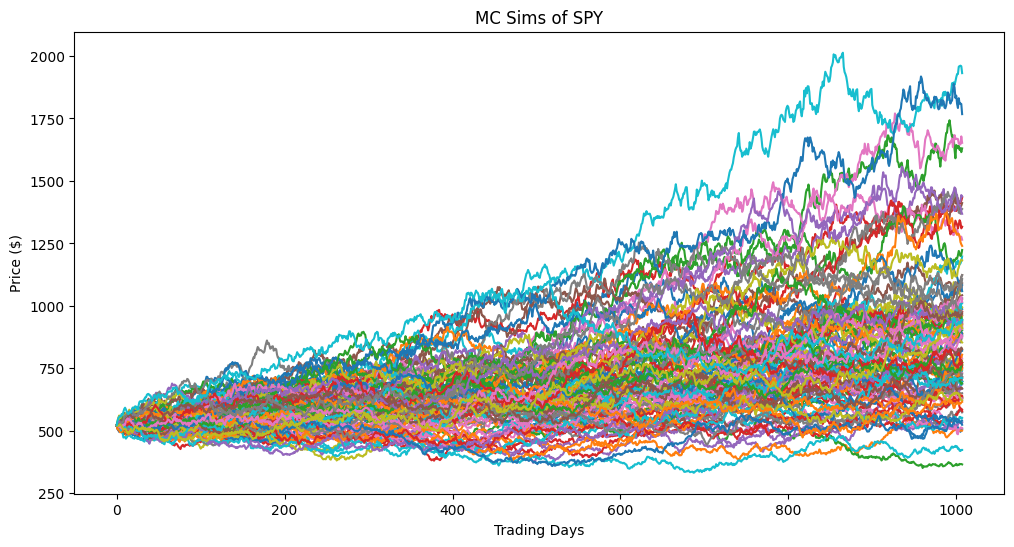

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for SPY
spy = yf.download('SPY', start='2015-01-01')

# Calculate daily returns
daily_returns = spy['Adj Close'].pct_change()

# Calculate mean and standard deviation of daily returns
mu = daily_returns.mean()
sigma = daily_returns.std()

# Define simulation parameters
n_simulations = 100
n_days = 252*4  # number of trading days in a year

# Run simulations
simulations = np.random.normal(mu, sigma, size=(n_days, n_simulations))
prices = np.zeros_like(simulations)
prices[0] = spy['Adj Close'].iloc[-1]  # set initial price to last closing price

for i in range(1, n_days):
    prices[i] = prices[i-1] * np.exp(simulations[i])

# Plot simulations
plt.figure(figsize=(12,6))
plt.plot(prices)
plt.xlabel('Trading Days')
plt.ylabel('Price ($)')
plt.title('MC Sims of SPY')
plt.show()

In [3]:
# !pip install yfinance